In [257]:
#import libraries
import pandas as pd
import sklearn
import numpy as np
#import news articles data set
df=pd.read_csv("News_articles_dataset.csv",parse_dates=["Date"])


In [258]:
#check if any null values are present in news articles dataset
df.isnull().sum()

Date         0
Headlines    0
dtype: int64

In [259]:
#sort the data
df.sort_index(inplace=True)

In [260]:
df.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."


In [261]:

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [262]:
#preprocessing text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


In [263]:
#use ssentiment_analyzer and calculate the scores
vader = SentimentIntensityAnalyzer()

scores = df['Headlines'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

df = df.join(scores_df, rsuffix='_right')

df.head()

,Date,Headlines,neg,neu,pos,compound
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.069,0.820,0.111,0.2263
1,2015-02-01,What to expect from Apple in 2015 beyond its s...,0.041,0.849,0.110,0.9881
2,2015-03-01,Mountie: An inexpensive and innovative way to ...,0.124,0.763,0.112,0.1381
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",0.074,0.874,0.052,-0.5330
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.020,0.868,0.112,0.9949


In [264]:
#0 if coumpound value is less than 0 and 1 if greater than 0
def get_vader_score(sentence): 
    compound=vader.polarity_scores(sentence)['compound']
    if compound > 0: 
        return 1
    else: 
        return 0
df['final']=df.apply(lambda x: get_vader_score(x['Headlines']), axis=1)

In [265]:
df


,Date,Headlines,neg,neu,pos,compound,final
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.069,0.820,0.111,0.2263,1
1,2015-02-01,What to expect from Apple in 2015 beyond its s...,0.041,0.849,0.110,0.9881,1
2,2015-03-01,Mountie: An inexpensive and innovative way to ...,0.124,0.763,0.112,0.1381,1
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",0.074,0.874,0.052,-0.5330,0
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.020,0.868,0.112,0.9949,1
...,...,...,...,...,...,...,...
2360,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...,0.030,0.807,0.163,0.9945,1
2361,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...,0.019,0.841,0.140,0.9951,1
2362,2021-06-21,Apple is shortening new free TV Plus trials fr...,0.029,0.856,0.115,0.9972,1
2363,2021-06-22,Google likely to soon face antitrust claims ov...,0.032,0.793,0.175,0.9994,1


In [271]:
#Make index as date
df.index=df['Date']

In [272]:
df_date

0      2015-01-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-05-01
          ...    
2360   2021-06-19
2361   2021-06-20
2362   2021-06-21
2363   2021-06-22
2364   2021-06-23
Name: Date, Length: 2365, dtype: datetime64[ns]

In [273]:
df

,Date,Headlines,neg,neu,pos,compound,final
Date,,,,,,,
2015-01-01,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.069,0.820,0.111,0.2263,1
2015-02-01,2015-02-01,What to expect from Apple in 2015 beyond its s...,0.041,0.849,0.110,0.9881,1
2015-03-01,2015-03-01,Mountie: An inexpensive and innovative way to ...,0.124,0.763,0.112,0.1381,1
2015-04-01,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",0.074,0.874,0.052,-0.5330,0
2015-05-01,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.020,0.868,0.112,0.9949,1
...,...,...,...,...,...,...,...
2021-06-19,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...,0.030,0.807,0.163,0.9945,1
2021-06-20,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...,0.019,0.841,0.140,0.9951,1
2021-06-21,2021-06-21,Apple is shortening new free TV Plus trials fr...,0.029,0.856,0.115,0.9972,1


In [274]:
#drop date
df.drop(['Date'],axis=1,inplace=True)

In [275]:
df

,Headlines,neg,neu,pos,compound,final
Date,,,,,,
2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...,0.069,0.820,0.111,0.2263,1
2015-02-01,What to expect from Apple in 2015 beyond its s...,0.041,0.849,0.110,0.9881,1
2015-03-01,Mountie: An inexpensive and innovative way to ...,0.124,0.763,0.112,0.1381,1
2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",0.074,0.874,0.052,-0.5330,0
2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",0.020,0.868,0.112,0.9949,1
...,...,...,...,...,...,...
2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...,0.030,0.807,0.163,0.9945,1
2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...,0.019,0.841,0.140,0.9951,1
2021-06-21,Apple is shortening new free TV Plus trials fr...,0.029,0.856,0.115,0.9972,1


In [276]:
df.drop(['Headlines','compound'],axis=1,inplace=True)


In [277]:
df

,neg,neu,pos,final
Date,,,,
2015-01-01,0.069,0.820,0.111,1
2015-02-01,0.041,0.849,0.110,1
2015-03-01,0.124,0.763,0.112,1
2015-04-01,0.074,0.874,0.052,0
2015-05-01,0.020,0.868,0.112,1
...,...,...,...,...
2021-06-19,0.030,0.807,0.163,1
2021-06-20,0.019,0.841,0.140,1
2021-06-21,0.029,0.856,0.115,1


In [278]:
df.isna().sum()


neg      0
neu      0
pos      0
final    0
dtype: int64

In [279]:
df = df.dropna()
df['final'] = df['final'].astype(int)

In [280]:
x=df.iloc[:,:-1]
cols=['negative','neutral','positive']
x

,neg,neu,pos
Date,,,
2015-01-01,0.069,0.820,0.111
2015-02-01,0.041,0.849,0.110
2015-03-01,0.124,0.763,0.112
2015-04-01,0.074,0.874,0.052
2015-05-01,0.020,0.868,0.112
...,...,...,...
2021-06-19,0.030,0.807,0.163
2021-06-20,0.019,0.841,0.140
2021-06-21,0.029,0.856,0.115


In [281]:
y=df['final']
y

Date
2015-01-01    1
2015-02-01    1
2015-03-01    1
2015-04-01    0
2015-05-01    1
             ..
2021-06-19    1
2021-06-20    1
2021-06-21    1
2021-06-22    1
2021-06-23    1
Name: final, Length: 2365, dtype: int32

In [282]:
x.isnull().sum()


neg    0
neu    0
pos    0
dtype: int64

In [283]:
y.isnull().sum()

0

In [284]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(0, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(0, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[0.26235741, 0.56834532, 0.43190661],
        [0.15589354, 0.63788969, 0.42801556],
        [0.47148289, 0.43165468, 0.43579767],
        ...,
        [0.11026616, 0.65467626, 0.44747082],
        [0.121673  , 0.50359712, 0.68093385],
        [0.14448669, 0.67386091, 0.38521401]]),
 array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]))

In [285]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [286]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred[0:150]
#y_test[10:50]

C:\Users\Dell\New folder\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [287]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8562367864693446

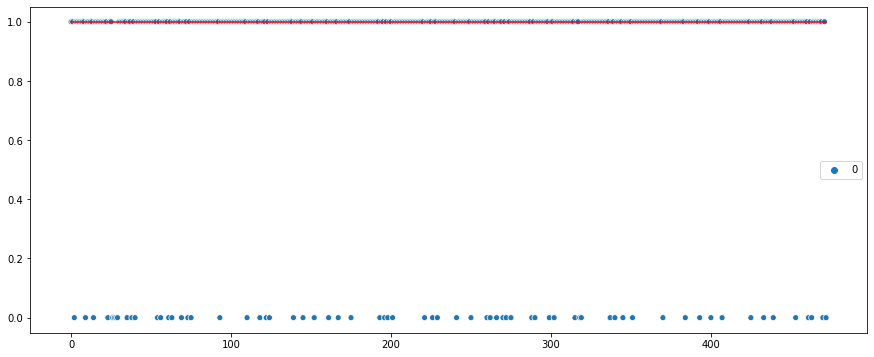

In [298]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=y_pred,color="r",size_order=2014)
sns.scatterplot(data=y_test,color="b",size_order=2014)